In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import os

data_dir ='data'

# Question 2.1 - Load Data

Download prostate data from https://web.stanford.edu/~hastie/ElemStatLearn/data.html

Take x1 = lcavol, x2 = lweight, x3 = age, x4 = lbph, x5 = svi, x6 = lcp, x7 = gleason, x8 = pgg45,
and define the response variable y = lpsa. Standardize all variables. Show the 8 scatter plot of y against each x1, . . . , x8

In [2]:
prostate_df = pd.read_csv(os.path.join(data_dir, 'prostate.data'),sep='\t', index_col=0)
prostate_df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


We don't need train so we drop it

In [3]:
prostate_df = prostate_df.drop('train', axis=1)
prostate_df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


In [4]:
var_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y']
prostate_df = prostate_df.reset_index(drop=True)
prostate_df.columns = var_names
prostate_df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


Standardize

In [5]:
from sklearn.preprocessing import StandardScaler

prostate_df.iloc[:,:] = StandardScaler().fit_transform(prostate_df.values)

prostate_df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-1.834631
...,...,...,...,...,...,...,...,...,...
92,1.262444,0.580608,0.558151,-1.030029,1.902379,1.079149,0.344407,1.269449,1.660415
93,2.107397,0.628738,-2.682185,-1.030029,1.902379,1.688267,0.344407,0.556647,1.921044
94,1.328267,-0.546127,-1.602073,-1.030029,1.902379,1.900197,0.344407,-0.512556,2.320465
95,1.307045,0.340141,0.558151,1.010033,1.902379,1.249088,0.344407,1.982251,2.611649


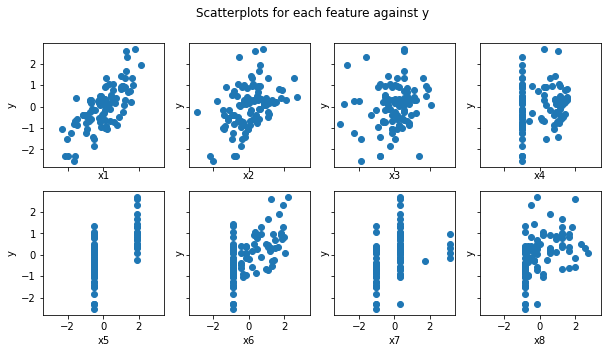

In [6]:
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize = (10, 5))

for i, ax in enumerate(axs.flat):
    ax.scatter(prostate_df.iloc[:,i], prostate_df.iloc[:,-1])
    ax.set_xlabel(prostate_df.columns[i])
    ax.set_ylabel(prostate_df.columns[-1])
    
fig.suptitle('Scatterplots for each feature against y')
plt.show()

In [7]:
prostate_df.to_pickle(os.path.join(data_dir, 'prostate_df.pkl'))

# Question 2.2

Use a Markov chain Monte Carlo sampler to take samples from the posterior of w in Question 1 over this data set and visualize your samples, do they converge?


In [8]:
prostate_df = pd.read_pickle(os.path.join(data_dir, 'prostate_df.pkl'))

## Find estimation of $\lambda$ and $\sigma^2$ using least squares

Fit a linear model to the data (we know it to be linear)

In [9]:
from sklearn.linear_model import LinearRegression

X,y = prostate_df.drop('y', axis=1), prostate_df['y']
lr = LinearRegression(fit_intercept=False).fit(X,y)

Using least squares predicted value as the mean, find variance

$\sigma^2=(\Sigma_{i=1}^n(\hat{y_i}-y_i)^2)/(n-1)$

In [10]:
var_y = np.square(lr.predict(X) - y).sum()/(y.size - 1)

$\lambda=(\Sigma_{i=1}^N(w_i)^2)/(N-1)$

Find the variance of all the ws

In [11]:
w_hat = lr.coef_
lam = np.square(w_hat).sum()/(w_hat.size - 1)

In [59]:
print(f'Variance of y: {var_y}, Lambda: {lam}')

Variance of y: 0.34011679319379495, Lambda: 0.0746875038667315


Create MCMC sampler

In [90]:
from scipy.stats import multivariate_normal as mn
np.random.seed(235)

mu_w = np.zeros(X.shape[1])
cov_w = np.eye(X.shape[1])*lam
cov_y = np.eye(X.shape[0])*var_y
scale = 0.005

# This is our PDF from 1.4, but log transformed
posterior_log = lambda w, X, y : np.log(mn.pdf(y, np.matmul(X, w), cov_y)) + np.log(mn.pdf(w, mu_w, cov_w))
# Random walk transitions
RW = lambda w, scale: np.random.multivariate_normal(w, scale*np.eye(len(w)))
# Initialize w according to its known multivariate normal distribution
w_0 = np.random.multivariate_normal(mu_w, cov_w)
w = w_0

In [91]:
iterations = 10000
history = np.zeros((iterations, X.shape[1]))
accepted = np.zeros(iterations, dtype=bool)
for i in range(iterations):
    log_p = posterior_log(w, X, y)
    
    # walk w
    w_new = RW(w, scale)
    log_p_new = posterior_log(w_new, X, y)
    
    # sample a minimum ratio 
    r = np.random.uniform(0,1)

    # transform back from log to normal
    if np.exp(log_p_new - log_p) > r:
        w = w_new
        accepted[i] = True
    
    history[i] = w_new

    # print(w)

In [92]:
accepted[:-10]


array([False, False,  True, ..., False, False, False])

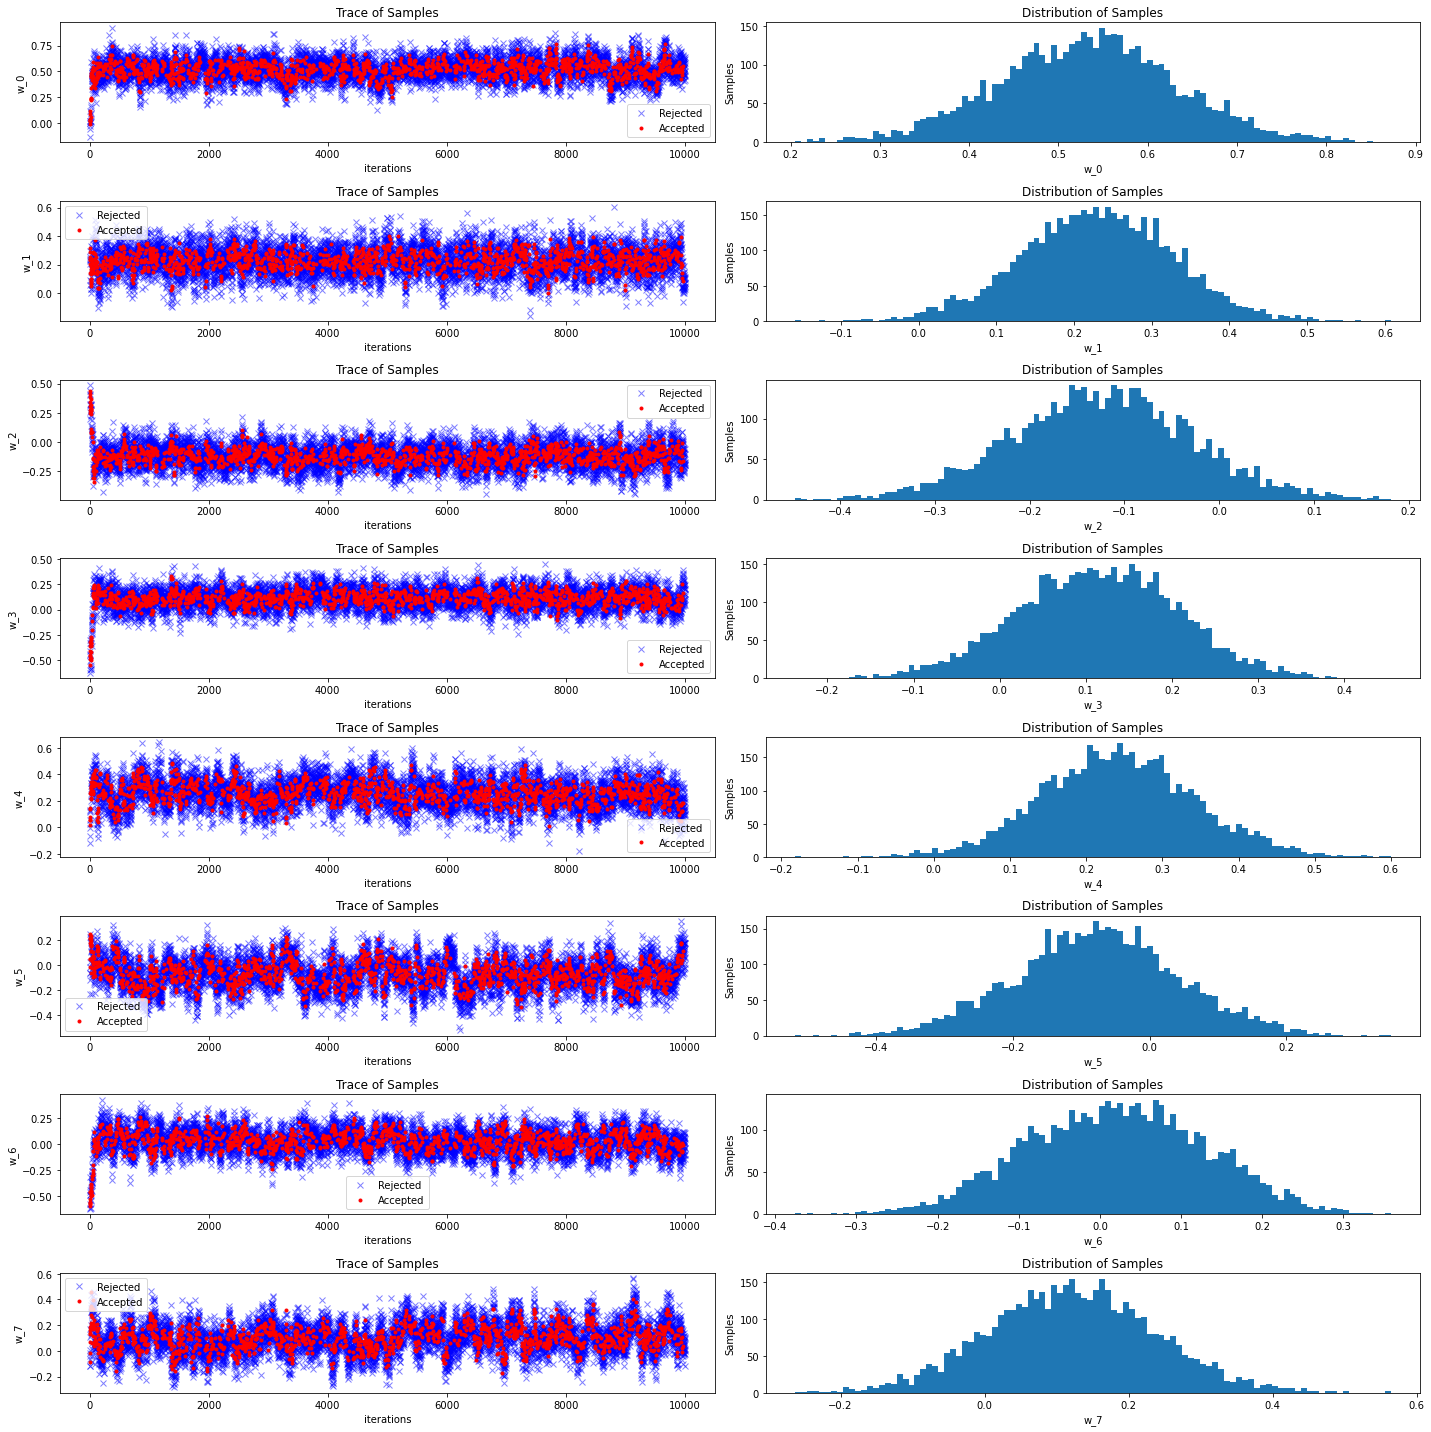

In [93]:
fig, axs = plt.subplots(X.shape[1], 2, figsize = (20,20))

for i, ax in enumerate(axs):
    iteration = np.arange(iterations)
    ax[0].plot(iteration[~accepted], history[~accepted,i], 'bx', label='Rejected',alpha=0.5)
    ax[0].plot(iteration[accepted], history[accepted,i], 'r.', label='Accepted',alpha=1)
    ax[0].set_xlabel('iterations')
    ax[0].set_ylabel(f'w_{i}')
    ax[0].legend()
    ax[0].set_title('Trace of Samples')
    
    ax[1].hist(history[len(history)//2:,i], bins=100)
    # ax[1].hist(history[accepted,i][len(history[accepted,i])//2:], bins=100) # drop 1st 50% in hist
    ax[1].set_ylabel('Samples')
    ax[1].set_xlabel(f'w_{i}')
    ax[1].set_title('Distribution of Samples')
    
# fig.suptitle('Traces and histogram for each element of w')
plt.tight_layout()
plt.show()



Compare MSE of initial w vs that from linear regression to see if it converged:

In [94]:
accepted_ws = history[~accepted]
w_est = np.mean(accepted_ws[len(accepted_ws) // 2:], axis=0)
w_est2 = np.mean(history[len(history) // 2:], axis=0)
print("MSEs for each estimate against w obtained from least squares:")
print("initial w: ", np.mean((w_0-w_hat)**2))
print("average w across entire history: ", np.mean((w_est-w_hat)**2))
print("average w across last 50% of samples: ", np.mean((w_est2-w_hat)**2))

MSEs for each estimate against w obtained from least squares:
initial w:  0.16182593047885596
average w across entire history:  0.0007629821531421636
average w across last 50% of samples:  0.0007611308527637202


# Question 2.3

In [95]:
# calculate posterior likelihood for each sample
log_ps = np.array([posterior_log(his, X, y) for his in history])
w_MAP = history[np.argmax(log_ps)]

In [96]:
w_MAP, w_hat

(array([ 0.50907074,  0.24003851, -0.12031358,  0.14268666,  0.24471567,
        -0.02464747,  0.0801867 ,  0.01005218]),
 array([ 0.57621928,  0.23085294, -0.13704517,  0.12155214,  0.2731707 ,
        -0.1284605 ,  0.03079639,  0.10891159]))

# Question 2.4

In [28]:
w_est.shape

(8,)

In [19]:
prostate_df = pd.read_pickle(os.path.join(data_dir, 'prostate_df.pkl'))


In [20]:
from sklearn.decomposition import PCA

prostate_pc = PCA().fit_transform(prostate_df.drop('y', axis=1))

In [21]:
prostate_pc.shape

(97, 8)

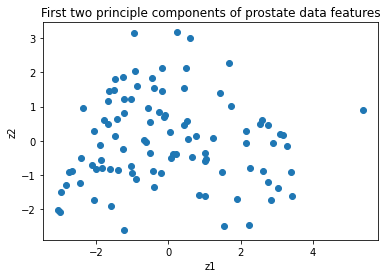

In [22]:
plt.scatter(prostate_pc[:, 0], prostate_pc[:, 1])
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('First two principle components of prostate data features')
plt.show()